In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
preorder_table =  pd.read_csv('Inflight Service_Pre order data.csv')

In [5]:
satisfaction_table = pd.read_csv('Survey data_Inflight Satisfaction Score.csv')

In [7]:
f1=pd.merge(preorder_table,satisfaction_table,on='flight_number',how = 'inner')

In [14]:
df = f1[['flight_number','scheduled_departure_dtl','score','pre_order_qty']]

In [12]:
df.head()

,flight_number,scheduled_departure_dtl,score,pre_order_qty
0,1423,9/1/2022,2,1
1,1423,9/1/2022,chicken entrée,1
2,1423,9/1/2022,2,1
3,1423,9/1/2022,1,1
4,1423,9/1/2022,1,1


In [45]:
numeric_columns = ['score', 'pre_order_qty']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
numeric_df = df.dropna(subset=numeric_columns)


<ipython-input-45-be7f947c79cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')


In [62]:
numeric_df.head()

,flight_number,scheduled_departure_dtl,score,pre_order_qty
0,1423,9/1/2022,2.0,1
2,1423,9/1/2022,2.0,1
3,1423,9/1/2022,1.0,1
4,1423,9/1/2022,1.0,1
5,1423,9/1/2022,2.0,1


In [63]:
grouped = df.groupby(['flight_number', 'scheduled_departure_dtl']).agg({'score': 'sum', 'pre_order_qty': 'sum'}).reset_index()


In [64]:
grouped.head()

,flight_number,scheduled_departure_dtl,score,pre_order_qty
0,2,9/20/2022,254.0,340
1,2,9/21/2022,254.0,0
2,2,9/22/2022,127.0,85
3,3,9/20/2022,888.0,1036
4,3,9/22/2022,111.0,74


In [65]:
x=grouped['pre_order_qty']
y=grouped['score']

In [66]:
linreg=LinearRegression()
x=x.values.reshape(-1,1)
linreg.fit(x,y)
y_predict=linreg.predict(x)

In [67]:
plt.scatter(x,y)
plt.plot(x,y_predict,color='blue')
plt.title=('linearreg')
plt.xlabel('pre_order')
plt.ylabel('score')

Text(0, 0.5, 'score')

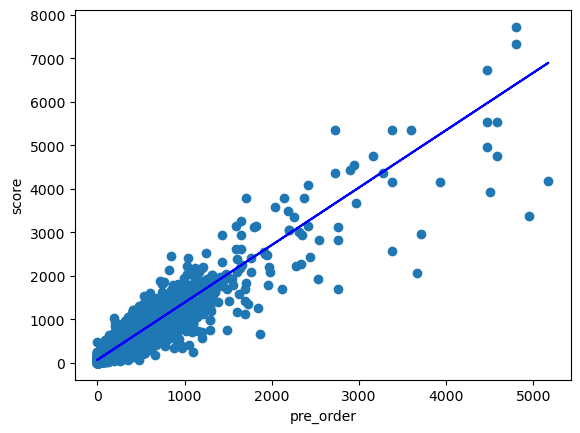

In [68]:
plt.show()

In [69]:
slope=linreg.coef_
intercept=linreg.intercept_
Rsqr=linreg.score(x,y)

In [70]:
print("Slope=",slope,"intercept=",intercept,"R squared=",Rsqr)

Slope= [1.32044757] intercept= 66.01691620442841 R squared= 0.8438107064102442
